In [1]:
%matplotlib inline


# Submaps and Cropping


In this example we demonstrate how to get a submap of a map.



Start by importing the necessary modules.



In [2]:
from __future__ import print_function, division

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
import sunpy.data.sample
import matplotlib.pyplot as plt

Sunpy sample data contains a number of suitable maps, where the
sunpy.data.sample.NAME returns the location of the given FITS file.



In [3]:
swap_map = sunpy.map.Map(sunpy.data.sample.SWAP_LEVEL1_IMAGE)

/Users/tiago/miniconda/lib/python3.6/site-packages/sunpy/map/sources/proba2.py:42: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(name='sdoaia171')


This has resolution and ranges of:



In [4]:
print(swap_map.dimensions)
print(swap_map.data)

PixelPair(x=<Quantity 1024. pix>, y=<Quantity 1024. pix>)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


To find out more specifics about this map and the instrument used, check it's
metatdata:



In [5]:
print(swap_map.meta)

MetaDict([('simple', True), ('bitpix', 16), ('naxis', 2), ('naxis1', 1024), ('naxis2', 1024), ('comment', '------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------$Id: swap_fits_template 3732 2010-09-28 20:42:23Z bogdan $-------------------------------------------------------------------------------------------------------------------

To crop the data you create a submap, specifying the top right and bottom
left as SkyCoord objects.



/Users/tiago/miniconda/lib/python3.6/site-packages/sunpy/map/sources/proba2.py:42: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(name='sdoaia171')
/Users/tiago/miniconda/lib/python3.6/site-packages/sunpy/map/mapbase.py:1514: Warning: Missing metadata for solar radius: assuming photospheric limb as seen from Earth
  radius = self.rsun_obs.to(u.deg).value
/Users/tiago/miniconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


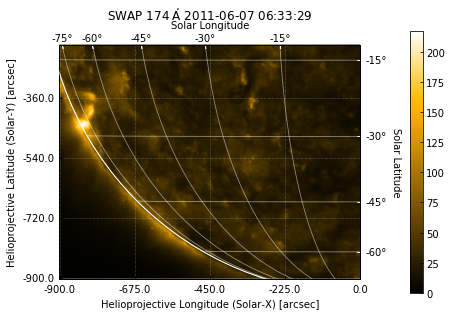

In [6]:
top_right = SkyCoord(0*u.arcsec, -200 * u.arcsec, frame=swap_map.coordinate_frame)
bottom_left = SkyCoord(-900 * u.arcsec, -900 * u.arcsec, frame=swap_map.coordinate_frame)
swap_submap = swap_map.submap(bottom_left, top_right)
swap_submap.peek(draw_limb=True, draw_grid=True)
plt.tight_layout(pad=1.00)
plt.show()